<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/Used%20Car%20Price%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Price Prediction**

### **Context:**

 - There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past the pre-owned car market has continued to grow over the past few years and is now larger than the new car market.Cars4U is a budding tech start-up that aims to find footholes in this market.
 
 - In 2018-19,while new car sales were recorded at 3.6million units around 4million second-hand cars were bought and sold There is a slow down in new car sales and that could mean that the demand is shifting towards the pre-owned market.In fact,some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.
 
 - Unlike new cars,where price and supply are fairly deterministic and managed by OEMs(Original Equipment Manufacturer except for dealership level discounts which come into play only in the last stage of the customer journey), the used carmarket is a very different beast,with large uncertainties in both pricing and supply.Several factors,including mileage,brand,model,year,etc.can influence the actual worth of a car.From the perspective of a seller it is not an easy task to set the correct price of a used car.Keeping this in mind,the pricing scheme of these used cars becomes important in order to grow in the market.


### **The objective:**

 - To build a model to predict the key factors that would influence the used cars price fluctuations. 

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)



### **Load the data**

In [ ]:
from google.colab import files
upload = files.upload()

Saving used_cars.csv to used_cars (1).csv


In [ ]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
# View last 5 rows
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


### **Check the data types and and missing values of each column** 

In [ ]:
# Check the datatypes of each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
# Check total number of missing values of each column. 
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**
* There are 7253 observations and 13 columns in the dataset.
* Name, Location, Fuel_Type, Transmission, Owner_Type are of object type while rest of columns are of numeric type.
* The variable of Mileage, Engine, Power, Seats, New_price and Price have the missing values in the dataset.  

**S.No. looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.**

In [ ]:
# Remove S.No. column from data. 
data.drop(['S.No.'], axis=1, inplace=True)

## **Exploratory Data Analysis**

### **Explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


**Observations and Insights:**

* There are 7253 observation in the datasets.
* The average year of production of cars is in 2013.
* The total average kilometers driven in the car by the previous owners is 58699 km. It has a large range of values from 171km to 65,000,000km. This value may includes outliers. We will observe it later. At least 75% of cars have been driven 73000km. 
* The average displacement volumn of the engine is 1616 CC. This value has a large range from 72CC to 5998CC. At least 75% of displacement volumn of the engine is 1968. This value may contains outliers. We will take it look later.
* The average maximum power of the engine is 112bhp. This value ranges from 34 to 616. It may contains outliers as well.
* The average price of a new car of the same model is 2M INR (33K CAD), it ranges from 390K INR （6K CAD） to 37.5M INR (635K CAD). At least 50% new car price with the same model is 18K CAD.
* The average price of the used car is 900K INR (15K CAD).

### **Explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

In [ ]:
for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Explore basic summary statistics of categorical variables. 
data.describe(include='category').T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [ ]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique())
    
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------


In [ ]:
# Checking the count of unique values in each categorical column 

cat_cols= data.select_dtypes(['category'])

for i in cat_cols.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize=True))
    print('*'*40)

Unique values in Name are :
Mahindra XUV500 W8 2WD             0.007583
Maruti Swift VDI                   0.006756
Maruti Swift Dzire VDI             0.005791
Honda City 1.5 S MT                0.005377
Maruti Swift VDI BSIV              0.005101
                                     ...   
Mahindra NuvoSport N8              0.000138
Mahindra Logan Petrol 1.4 GLE      0.000138
Mahindra Logan Diesel 1.5 DLS      0.000138
Mahindra KUV 100 mFALCON G80 K8    0.000138
Mahindra Xylo D2 BS III            0.000138
Name: Name, Length: 2041, dtype: float64
****************************************
Unique values in Location are :
Mumbai        0.130842
Hyderabad     0.120778
Coimbatore    0.106439
Kochi         0.106439
Pune          0.105474
Delhi         0.090997
Kolkata       0.090170
Chennai       0.081484
Jaipur        0.068799
Bangalore     0.060665
Ahmedabad     0.037915
Name: Location, dtype: float64
****************************************
Unique values in Fuel_Type are :
Diesel      0.53

#### **Observations and Insights:**
* Location contains 11 unique values. 13% of used cars are located in Mumbai, 12% are in hyderabad.
* Fuel_Type includes 5 unique values, diesel, petrol, cng, lpg and electic; 53% of used car in India are diesel cars, 45% of them are petrol.
* Transmission includes 2 unique values, manual and automatic; 72% of used cars are manual and 28% of them are automatic.
* Owner_Type includes 4 unqiue values, first hand, second hands, third hands and four or above. We can find that 82% of used cars are first hand, 16% are second hands.

**Check Kilometers_Driven extreme values**

In [ ]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(by='Kilometers_Driven',ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**
* We can observe that in the 2328 row, for BMW X5 xDrive 30d M Sport, the total kilometers driven in the car by the previous owner are 6,500,000 km, which is not possible. It can be treated as outlier.


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [ ]:
# Removing the 'row' at index 2328 from the data. 
data.drop([2328], inplace=True)

**Check Mileage extreme values**

In [ ]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(by='Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [ ]:

# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

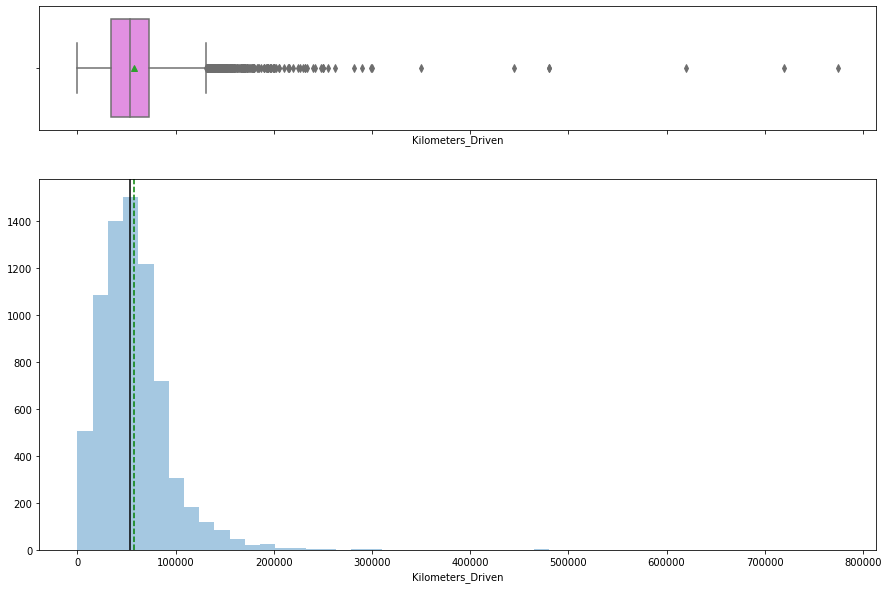

In [ ]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

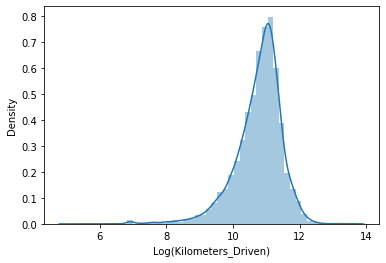

In [ ]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**

In [ ]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

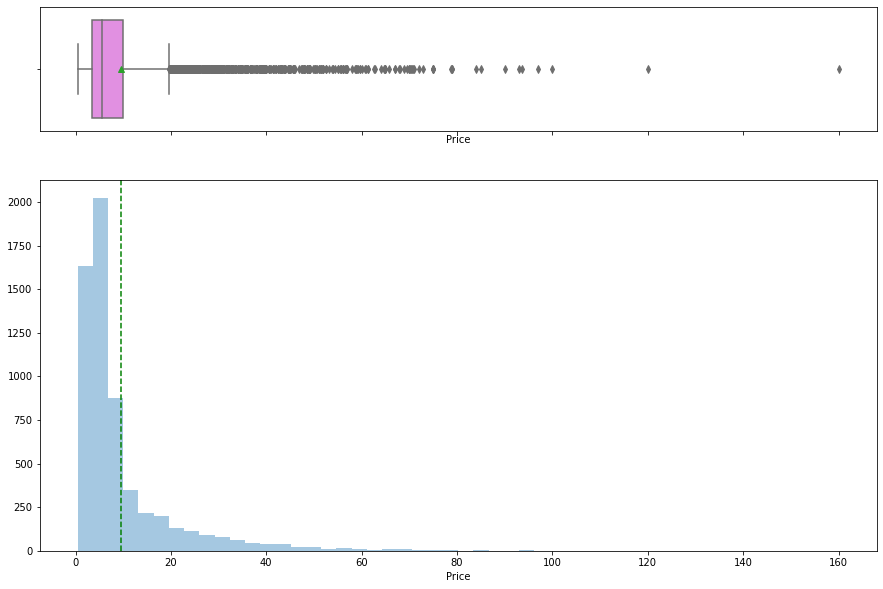

In [ ]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

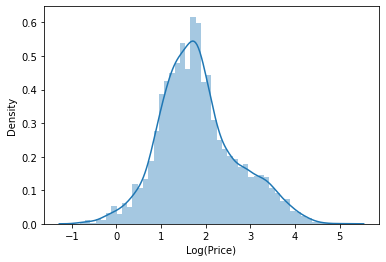

In [ ]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)")

In [ ]:
# We can Add a transformed Price feature in data
data["Price_log"] = np.log(data["Price"])

**Observations and Insights for all the plots:**
* The distribution of PRICE is right-skewed. This suggests that most of the used car are not expensive. The peak distribution shows most of the used cars has been sold about 1M INR.
* There are some outliers in the data. Few used cars have been sold about 8M INR, and very few used cars have been sold at 16M INR
* THe log transformation of the PRICE is nomal distribution. Most of the used cars have been solved at 2M INR.


## **2. Univariate analysis - Categorical Data**

In [ ]:
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

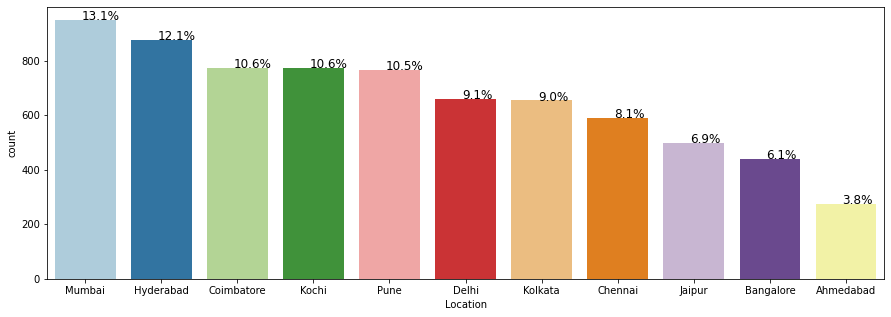

In [ ]:
# Bar Plot for 'Location'
perc_on_bar('Location')

**Observations:**
* Location variable contains 11 unique values. 13% of used cars are located in Mumbai, 12% are in hyderabad, Ahmedabad have the fewest number of used cars (3.8%).

## **Bivariate Analysis**

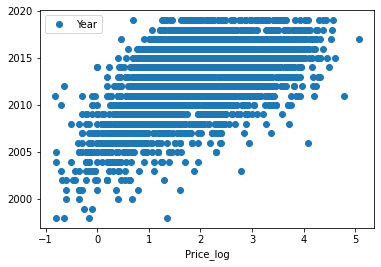

In [ ]:
# Plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_log', y = 'Year', style = 'o')

**Observations and Insights from all plots: _____**

* There is a strong postivite correlation between the LogPrice and Year.
* The used cars price tends to incresase with an increase in the production year. 
* There are some outliers but it would not impact on the correlation results. 


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

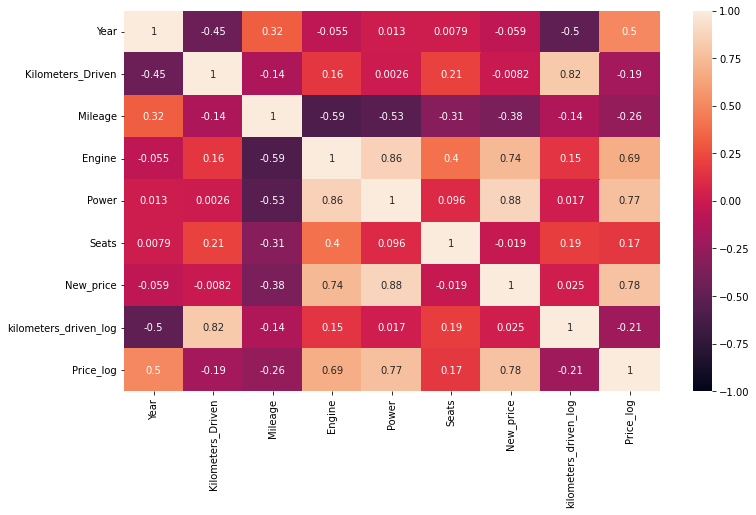

In [ ]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(['Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights: _____**

* Price is positively correlated with year, which indicates that the used cars price will increase with the production year increased.
* Price and standard mileage offered by the car company are negatively correlated, when the mileage goes up, the price of the used car will go down.
* The price of a used car is negatively correlated with total kilometers driven by the previous owners, as the number of miles driven by the previous owner goes up, the price of a used car goes down
* The price of a used car is positively correlated with the displacement volume of the engine, when the engine's volume is bigger, the price of the used car is higher  
* The price of a used car and the maximum power of the engine are significantly positively correlated, when the engine's power is greater, the price of the used car is higher

### **3. Box plot**

In [ ]:
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Plot bivariate analysis of target variable with a categorical variable 'Location'

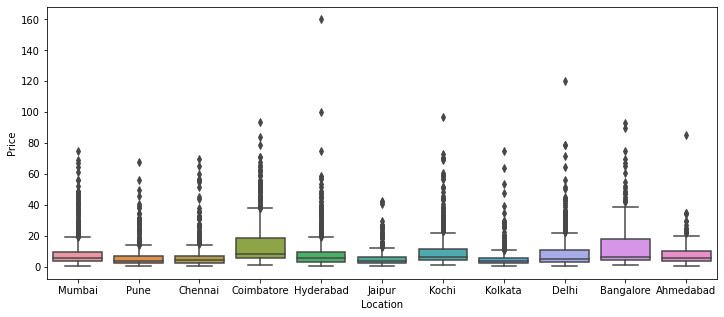

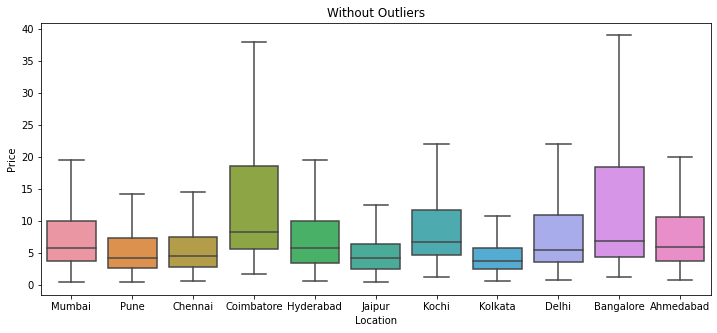

In [ ]:
# Box Plot: Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**


### **Feature Engineering**

### **Missing value treatment**

In [ ]:
# Check the missing values of each column.
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
dtype: int64

#### **Observations and Insights: _____**

**Missing values in Seats**

In [ ]:
# Checking missing values in the column 'Seats'
data.isnull()['Seats'].sum()

53

In [ ]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats']=data['Seats'].fillna(data['Seats'].median())

In [ ]:
# Check total number of missing values of the seat column to verify if they are imputed or not. 
data.isnull()['Seats'].sum()

0

**Missing values for Mileage**

In [ ]:
# Check missing values of each column. 
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
Price_log                1234
dtype: int64

In [ ]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage']=data['Mileage'].fillna(data['Mileage'].median())

In [29]:
# Check total number of missing values of the seat column to verify if they are imputed or not. 
data.isnull()['Mileage'].sum()

2

**Missing values for Engine**

In [ ]:
data['Engine']=data['Engine'].fillna(data['Engine'].median())
data.isnull()['Engine'].sum()

0

**Missing values for Power**

In [ ]:
data['Power']=data['Power'].fillna(data['Power'].median())
data.isnull()['Power'].sum()

0

**Missing values for New_price**

In [ ]:
data['New_price']=data['New_price'].fillna(data['New_price'].median())
data.isnull()['New_price'].sum()

0

In [ ]:
data['Price']=data['Price'].fillna(data['Price'].median())


In [ ]:
data['Price_log']=data['Price_log'].fillna(data['Price_log'].median())

In [ ]:
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
dtype: int64

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [ ]:
# Step-1
X = data.drop(['Name','Price','Price_log','Kilometers_Driven'], axis = 1)

y = data[["Price_log", "Price"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [ ]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(5076, 25) (2176, 25)


In [ ]:
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>
**5) XGBoost**

### **Fitting a linear model**

In [ ]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a linear regression model
lr = LinearRegression()

In [ ]:
data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
dtype: int64

In [ ]:
# Fit linear regression model
lr.fit(X_train, y_train['Price_log']) 

LinearRegression()

In [ ]:
from sklearn import metrics

In [ ]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.577415549639032
R-square on test set :  0.6969313279331848
RMSE on training set :  6.664266955156872
RMSE on test set :  5.681136103016527


**Observations from results: _____**

* In general, the low errors given by RMSE represents a positive impression about the model's accuracy.
* This suggested further investigation to improve the performance on general data.

**Important variables of Linear Regression**

Building a model using statsmodels.

In [ ]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     570.8
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:20:33   Log-Likelihood:                -2706.7
No. Observations:                5076   AIC:                             5463.
Df Residuals:                    5051   BIC:                             5627.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [ ]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Owner_Type_Second,-0.034413,4.721708e-02
Owner_Type_Fourth & Above,0.269942,4.087352e-02
Location_Hyderabad,0.084380,1.338210e-02
Location_Bangalore,0.097185,1.129573e-02
Fuel_Type_Diesel,0.206867,7.623691e-04
Owner_Type_Third,-0.183034,3.234403e-05
Location_Kolkata,-0.197183,3.852203e-08
kilometers_driven_log,-0.062374,7.489004e-09
Mileage,-0.012854,3.611786e-10
Engine,0.000193,1.343730e-12


In [ ]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Owner_Type', 'Location', 'Fuel_Type', 'kilometers_driven_log', 'Mileage', 'Engine', 'Transmission', 'Power', 'Year']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>


In [ ]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

In [ ]:
# Create a Ridge regression model
ridge=Ridge()

In [ ]:
# Fit Ridge regression model
ridge.fit(X_train, y_train['Price_log'])

Ridge()

In [ ]:
# Get score of the model
Ridge_model=get_model_score(ridge)

R-sqaure on training set :  0.5772466051562417
R-square on test set :  0.6967916648926751
RMSE on training set :  6.6655989713086825
RMSE on test set :  5.682444970321453


**Observations from results:**
* We can observe that the R-square on testing data is higher than that on training set, which means the testing set can explain more on variation than training set. Training set in Ridge model can only explain 57% of variation in the dependent variable; testing set can explain 69% of the variation in the dependent variable.
* The RMSE value is relatively lower on test set, which means the accuracy on testing set is higher than training set. 
* The overfitting problem still exists. The ridge regression model performed similiar with the linear regression model. 

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [ ]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

In [ ]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.999911010450209
R-square on test set :  0.5428271951902941
RMSE on training set :  0.0967086084337858
RMSE on test set :  6.97758064876294


**Observations from results:**

* The training set in decision tree model can explain 99.9% of variation in the dependent variable. However,the testing set can only explain 54% of variation.
* The RMSE value is pretty low on training set, which means the accuracy in training is high. However, in the testing set RMSE increased a lot. We can say the decision tree model does not perform well compared with other models. 

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.537706
Year                       0.209617
kilometers_driven_log      0.067192
Engine                     0.054386
Mileage                    0.039946
New_price                  0.017206
Transmission_Manual        0.008550
Location_Kolkata           0.006714
Seats                      0.006694
Location_Coimbatore        0.006345
Owner_Type_Second          0.005572
Location_Hyderabad         0.005274
Location_Pune              0.004487
Fuel_Type_Diesel           0.004369
Location_Delhi             0.004089
Location_Mumbai            0.003841
Location_Kochi             0.003695
Location_Bangalore         0.003644
Location_Jaipur            0.003112
Location_Chennai           0.002725
Fuel_Type_Petrol           0.001981
Owner_Type_Third           0.001676
Owner_Type_Fourth & Above  0.001165
Fuel_Type_LPG              0.000014
Fuel_Type_Electric         0.000000


**Observations and insights:**

* Power, Year, Kilometers_driven_log, Engine, Mileage are the most important features followed by new_price and transmission.
* The rest of variables have no significant impact in decision tree model to predict the used car prices.

### **Random Forest**


In [ ]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Create a Randomforest regression model 
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [ ]:
# Fit Randomforest regression model
random_forest.fit(X_train, y_train['Price_log'])

RandomForestRegressor(random_state=1)

In [ ]:
# Get score of the model
random_forest_model = get_model_score(random_forest)

R-sqaure on training set :  0.9250754655808493
R-square on test set :  0.6686668787476377
RMSE on training set :  2.806129153680012
RMSE on test set :  5.940145687944818


**Observations and insights:**

* R-squared in training set can explain 93% of variation in dependent variable. However, it is lower in testing set compared with that in training set. It can only explain 67% of the variation in dependent variable.
* The RMSE value in test set is higher than that in training set, which means there are more errors in test set compared with training set. 
* Compared with decision tree model, the performance of the random forest model has improved. Let's see the other models performance. 

**Feature Importance**

In [ ]:
# Print important features similar to decision trees
print(pd.DataFrame(random_forest.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.543375
Year                       0.204304
kilometers_driven_log      0.068297
Engine                     0.053042
Mileage                    0.040320
New_price                  0.015652
Seats                      0.007591
Transmission_Manual        0.006851
Location_Kolkata           0.006361
Location_Coimbatore        0.005932
Location_Hyderabad         0.005727
Owner_Type_Second          0.004967
Location_Mumbai            0.004921
Location_Kochi             0.004368
Location_Delhi             0.004160
Location_Pune              0.003967
Location_Bangalore         0.003967
Fuel_Type_Diesel           0.003470
Fuel_Type_Petrol           0.003211
Location_Jaipur            0.003107
Location_Chennai           0.003091
Owner_Type_Third           0.002036
Owner_Type_Fourth & Above  0.001226
Fuel_Type_LPG              0.000060
Fuel_Type_Electric         0.000000


**Observations and insights:**

* Power, year, kilometers_driven, engine, mileage, new_price are the most important features in the random forest model.
* The rest of variables have no significant impact in decision tree model to predict the used car prices.

### **Hyperparameter Tuning: Decision Tree**

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'max_depth': np.arange(2, 8), 
              
              'min_samples_leaf': [1, 3, 5, 7],
              
              'max_leaf_nodes': [2, 5, 7] + [None]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['Price_log'])

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, random_state=1)

In [ ]:
# Get score of the dtree_tuned
dtree_tuned_model = get_model_score(dtree_tuned)

R-sqaure on training set :  0.6845940730513687
R-square on test set :  0.6612778797509016
RMSE on training set :  5.75745502879963
RMSE on test set :  6.006015523307125


**Observations and insights:**

* The RMSE value on test sets is slightly higher than than on training set, which means the accuracy of test set is lower than that in training set. So we might be get better performance if we increase the complexity of the model.
* Compared with the previous model, tuned decison tree model performed well. Let's see the performance of other models.

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.675163
Year                       0.250392
Engine                     0.043708
Mileage                    0.010727
Transmission_Manual        0.007291
kilometers_driven_log      0.005311
Fuel_Type_Diesel           0.002064
Seats                      0.001733
Location_Kolkata           0.001542
New_price                  0.001206
Owner_Type_Third           0.000863
Location_Hyderabad         0.000000
Location_Delhi             0.000000
Location_Kochi             0.000000
Location_Coimbatore        0.000000
Location_Mumbai            0.000000
Location_Pune              0.000000
Location_Chennai           0.000000
Fuel_Type_Electric         0.000000
Fuel_Type_LPG              0.000000
Fuel_Type_Petrol           0.000000
Location_Bangalore         0.000000
Owner_Type_Fourth & Above  0.000000
Owner_Type_Second          0.000000
Location_Jaipur            0.000000


**Observations and insights:**
* Power, year, engine, mileage are the most important features in the tuned decision tree model.
* The rest of variables have no significant impact in tuned decision tree model to predict the used car prices.

### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Choose the type of Regressor
rf_tuned = RandomForestRegressor(random_state = 1)

# Define the parameters for Grid to choose from 
parameters = {"n_estimators": [110, 120],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]}

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer((metrics.r2_score))

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train['Price_log'])

# Set the model to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data

rf_tuned.fit(X_train, y_train['Price_log'])

RandomForestRegressor(max_depth=7, max_features=0.8, n_estimators=110,
                      random_state=1)

In [ ]:
# Get score of the model
rf_tuned_model = get_model_score(rf_tuned)

R-sqaure on training set :  0.7458787569709273
R-square on test set :  0.6464209556735199
RMSE on training set :  5.167923959419829
RMSE on test set :  6.136319014384656


**Observations and insights:**
* The RMSE value on test set slightly increased compared with training model, which means the test set have more errors than training set.
* Compared with the previous models, tuned random forest does not perform well.

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.532676
Year                       0.222353
Engine                     0.157731
kilometers_driven_log      0.023514
Mileage                    0.017095
Transmission_Manual        0.015715
New_price                  0.007771
Seats                      0.004454
Fuel_Type_Diesel           0.003886
Location_Kolkata           0.002388
Fuel_Type_Petrol           0.002335
Location_Coimbatore        0.001444
Owner_Type_Third           0.001245
Location_Kochi             0.001081
Location_Hyderabad         0.001054
Location_Pune              0.000888
Location_Mumbai            0.000796
Location_Bangalore         0.000783
Owner_Type_Fourth & Above  0.000762
Owner_Type_Second          0.000667
Location_Chennai           0.000544
Location_Jaipur            0.000455
Location_Delhi             0.000363
Fuel_Type_Electric         0.000000
Fuel_Type_LPG              0.000000


**Observations and insights: ______**
* Power, year, engine, kilometers_driven, mileage, transmission_manual are the most important features in tuned random forest model.
* The rest of variables have no significant impact in tuned random forest model to predict the used car prices.

**XGBoost**

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(random_state = 1)

In [ ]:
xgb.fit(X_train, y_train['Price_log'])

[02:29:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

In [ ]:
xgb_model=get_model_score(xgb)

R-sqaure on training set :  0.7553106932322378
R-square on test set :  0.6903946464921364
RMSE on training set :  5.071111091352838
RMSE on test set :  5.742075540190911


**Observations:**
* The train and the test scores are close to each other so we can say the model is not overfitting.
* However, the test score is slightly better than train score. Compared with the previous models, the XGB model's performance have increased but it did not perform not that well.

In [ ]:
print(pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Transmission_Manual        0.278910
Power                      0.229006
Engine                     0.157106
Year                       0.122645
Fuel_Type_Diesel           0.060854
Location_Kolkata           0.017182
kilometers_driven_log      0.014051
Owner_Type_Third           0.012574
Location_Coimbatore        0.012472
Seats                      0.011663
Location_Kochi             0.011156
Owner_Type_Fourth & Above  0.011072
Location_Hyderabad         0.010698
New_price                  0.010161
Mileage                    0.009730
Location_Bangalore         0.007382
Owner_Type_Second          0.005415
Location_Jaipur            0.003734
Location_Pune              0.003685
Location_Mumbai            0.003446
Fuel_Type_Petrol           0.003188
Location_Chennai           0.002005
Location_Delhi             0.001865
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000


**Observations:**
* Transmission_manual, power, engine, year, fuel_type_diesel are the most important features in the XGB model.
* The rest of variables have no significant impact in XGB model to predict the used car prices.


**Hyperparameter Tuning: XGB**

In [ ]:
xgb_tuned = XGBRegressor(random_state = 1, silent=True)

parameters = {'max_depth': np.arange(2, 8), 
              
              'min_child_weight':[1, 3, 5, 7],

               'gamma': [0.5, 1, 1.5, 2, 5]
             }

scorer = metrics.make_scorer((metrics.r2_score))

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring = scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train['Price_log'])


xgb_tuned = grid_obj.best_estimator_


xgb_tuned.fit(X_train, y_train['Price_log'])


XGBRegressor(gamma=0.5, max_depth=6, min_child_weight=7, random_state=1,
             silent=True)

In [ ]:
# Get score of the model
xgb_tuned_model = get_model_score(xgb_tuned)

R-sqaure on training set :  0.8264594603544035
R-square on test set :  0.7215110695725262
RMSE on training set :  4.270670854526254
RMSE on test set :  5.4458871719713535


**Observations:**
* The value of RMSE in tuned XGB model is the lowest we got so far, which means the accuracy of tuned XGB model is the highest, compared with other models.
* Besides, the R-square in tuned XGB is the highest compared with other models, which means tuned XGB model is the model that can explain the most variation in dependent variable.
* We can say that tuned XGB model is the best model we got so far.

In [ ]:
print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
Power                      0.330437
Year                       0.173067
Transmission_Manual        0.119200
Engine                     0.069096
Fuel_Type_Diesel           0.038558
Location_Kochi             0.024864
Location_Coimbatore        0.021477
Owner_Type_Third           0.019520
New_price                  0.019246
Location_Kolkata           0.019108
Seats                      0.018645
kilometers_driven_log      0.018046
Mileage                    0.017615
Location_Hyderabad         0.015270
Location_Jaipur            0.013795
Location_Bangalore         0.013274
Location_Mumbai            0.012786
Location_Delhi             0.011558
Owner_Type_Second          0.011519
Location_Pune              0.010376
Location_Chennai           0.009458
Fuel_Type_Petrol           0.008333
Owner_Type_Fourth & Above  0.004750
Fuel_Type_LPG              0.000000
Fuel_Type_Electric         0.000000


**Observations:**
* Power, year, transmission_manual, engine, fuel_type_diesel are the most important features in tuned XGB model.
* The rest of variables have no significant impact in tuned XGB model to predict the used car prices.

In [ ]:
# Defining list of models you have trained
models = [lr, dtree, random_forest, xgb, dtree_tuned, rf_tuned, xgb_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'XGBOOST','Tuned Decision Tree', 'Random Forest', 'Tuned Random Forest','Tuned XGBOOST'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.577416,0.696931,6.664267,5.681136
1,Decision Tree,0.999911,0.542827,0.096709,6.977581
2,XGBOOST,0.925075,0.668667,2.806129,5.940146
3,Tuned Decision Tree,0.755311,0.690395,5.071111,5.742076
4,Random Forest,0.684594,0.661278,5.757455,6.006016
5,Tuned Random Forest,0.745879,0.646421,5.167924,6.136319
6,Tuned XGBOOST,0.826459,0.721511,4.270671,5.445887


**Observations:**

* Linear regression model:

 * In general, the low errors given by RMSE represents a positive impression about the model's accuracy.
 * This suggested further investigation to improve the performance on general data.

* Decision tree model:
 * The training set in decision tree model can explain 99.9% of variation in the dependent variable. However,the testing set can only explain 54% of variation.
 * The RMSE value is pretty low on training set, which means the accuracy in training is high. However, in the testing set RMSE increased a lot. We can say the decision tree model does not perform well compared with other models.


* Tuned decision tree model:
 * The RMSE value on test sets is slightly higher than than on training set, which means the accuracy of test set is lower than that in training set. So we might be get better performance if we increase the complexity of the model.
 * Compared with the previous model, tuned decison tree model performed well. Let's see the performance of other models.

* Random forest model:
 * R-squared in training set can explain 93% of variation in dependent variable. However, it is lower in testing set compared with that in training set. It can only explain 67% of the variation in dependent variable.
 * The RMSE value in test set is higher than that in training set, which means there are more errors in test set compared with training set. 
 * Compared with decision tree model, the performance of the random forest model has improved. Let's see the other models performance. 

* Tuned random forest model:
 * The train and the test scores are close to each other so we can say the model is not overfitting.
 * However, the test score is slightly better than train score. Compared with the previous models, the XGB model's performance have increased but it did not perform not that well.

* XGB:
 * The train and the test scores are close to each other so we can say the model is not overfitting.
 * However, the test score is slightly better than train score. Compared with the previous models, the XGB model's performance have increased but it did not perform not that well.


* Tuned XGB:
 * The value of RMSE in tuned XGB model is the lowest we got so far, which means the accuracy of tuned XGB model is the highest, compared with other models.
 * Besides, the R-square in tuned XGB is the highest compared with other models, which means tuned XGB model is the model that can explain the most variation in dependent variable.
 * We can say that tuned XGB model is the best model we got so far.



## Conclusion and Recommendations:


* We observed that the most critical variables affecting used car prices are the year the used car was built, horsepower, the desplacement volume of the engine, and the number of miles that have been driven.

* As the year of manufacture of a used car gets older and the number of miles driven gets higher, the price of a used car gets lower; while the higher the horsepower and the desplacement volume of the engine, the higher the price of a used car.

* The company can focus on the power of the used car. 
  * For the used car with high power, the company can modify and refurbish it so that it can be resold at a higher price.

* At the same time, we found that used cars with automatic transmissions sell for a higher price than those with the manual. 
  * Common sense analysis suggests that the convenience of automatic cars is the key to this difference. The company could be biased to acquire automatic cars. 
* In addition, used manual cars have some degree of collector value. 
  * The company can also categorize its customer base according to the preferences of manual and automatic cars and periodically advertise to its customers.

